In [103]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import wbgapi as wb
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler

## Clustering (K-Means)

In [104]:
country_codes = ['ITA','KOR','IND']
ind1=["EN.POP.DNST"]
ind1m=["Population density"]
ind2=["NY.GDP.PCAP.PP.CD"]
ind2m=["GDP Per Capita"]

In [105]:
my_data1  = wb.data.DataFrame(ind1, country_codes, mrv=30).T
my_data1=my_data1.fillna(my_data1.median())
my_data1.head()

economy,IND,ITA,KOR
YR1991,299.770012,192.983989,448.846195
YR1992,305.835489,193.115117,453.534750
YR1993,311.922166,193.233215,458.165333
YR1994,318.042852,193.272585,462.798466
YR1995,324.204839,193.275655,467.478654


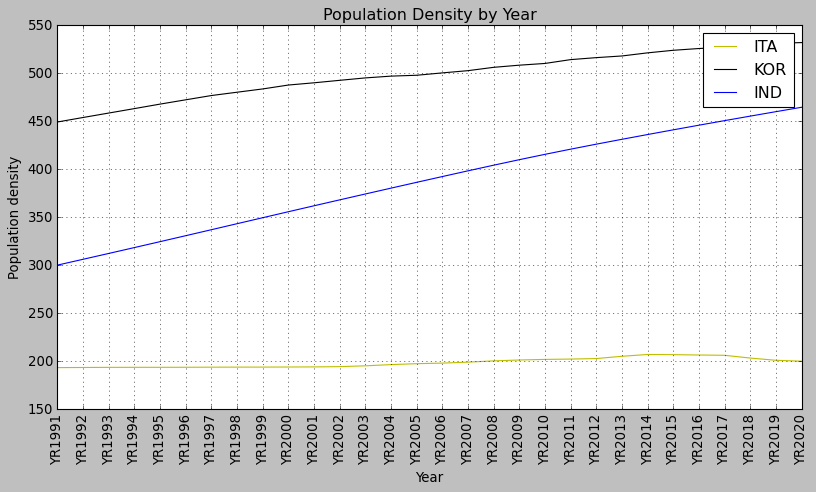

In [106]:
plt.figure(figsize=(12,6))
plt.title('Population Density by Year')
plt.plot(my_data1[country_codes[0]],"y",label=country_codes[0])
plt.plot(my_data1[country_codes[1]],"k",label=country_codes[1])
plt.plot(my_data1[country_codes[2]],"b",label=country_codes[2])
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("{}".format(ind1m[0]))
plt.grid()
plt.legend()
plt.show()

In [107]:
my_data2  = wb.data.DataFrame(ind2, country_codes, mrv=30).T
my_data2=my_data2.fillna(my_data2.mean())
my_data2.head()

economy,IND,ITA,KOR
YR1991,1229.302914,19540.324568,9474.642596
YR1992,1299.945950,20138.670537,10184.855665
YR1993,1366.779103,20427.727502,11030.711948
YR1994,1460.267846,21308.402242,12187.254966
YR1995,1573.332562,22382.897962,13502.582742


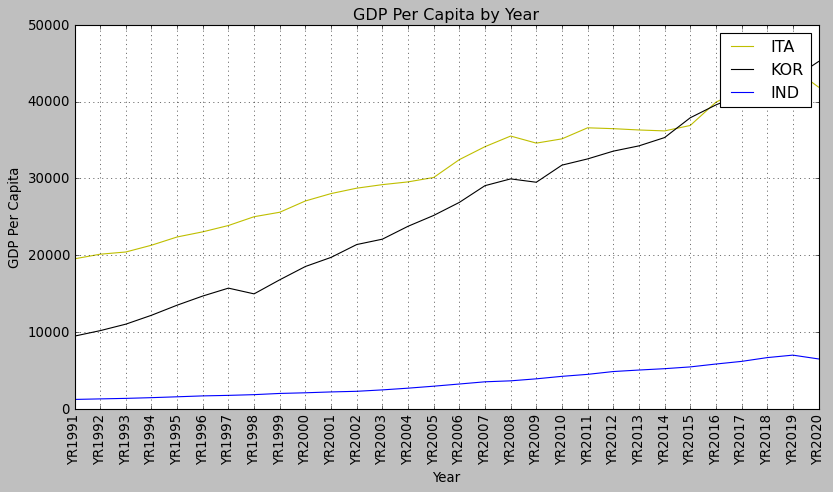

In [108]:
plt.figure(figsize=(12,6))
plt.title('GDP Per Capita by Year')
plt.plot(my_data2[country_codes[0]],"y",label=country_codes[0])
plt.plot(my_data2[country_codes[1]],"k",label=country_codes[1])
plt.plot(my_data2[country_codes[2]],"b",label=country_codes[2])
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("{}".format(ind2m[0]))
plt.grid()
plt.legend()
plt.show()

In [109]:
def normalization(data):
    minmax=MinMaxScaler()
    nrdta=minmax.fit_transform(data)
    return nrdta
norml=normalization(my_data1.values)

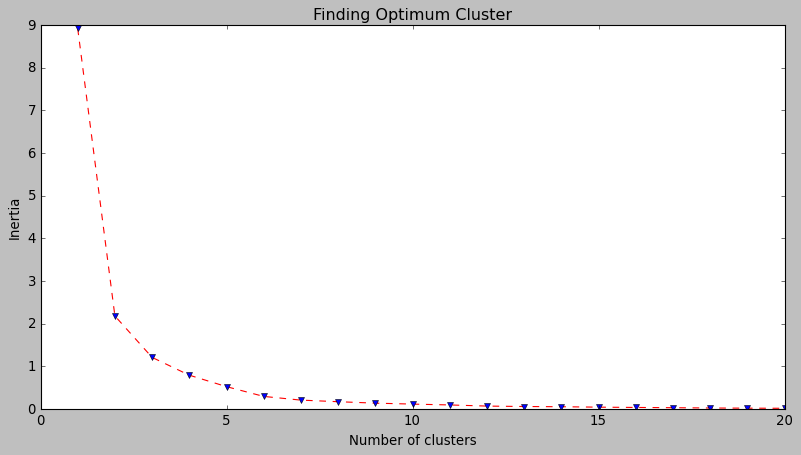

In [110]:
elb_list = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,  random_state=0)
    kmeans.fit(norml)
    elb_list.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.title('Finding Optimum Cluster')
plt.plot(range(1, 21), elb_list,"r--")
plt.plot(range(1, 21), elb_list,"vb")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [111]:
kmeans = KMeans(n_clusters=3, max_iter=100, n_init=50, random_state=0)
pred_y = kmeans.fit(norml)
for i in range(len(kmeans.cluster_centers_)):
    print("{} Custer Centre(Co-ord): {},{},{}".format(i,kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],kmeans.cluster_centers_[i][2]))

0 Custer Centre(Co-ord): 0.13045815464163002,0.02063530796242552,0.1938668296106768
1 Custer Centre(Co-ord): 0.8233324941047491,0.7364914615232437,0.859192655110083
2 Custer Centre(Co-ord): 0.44990523576047636,0.1818237378698419,0.5429161875196864


In [112]:
klb=[]
for i in kmeans.labels_:
    if i==0:
        klb.append(my_data1.columns[0])
    elif i==1:
        klb.append(my_data1.columns[1])
    elif i==2:
        klb.append(my_data1.columns[2])

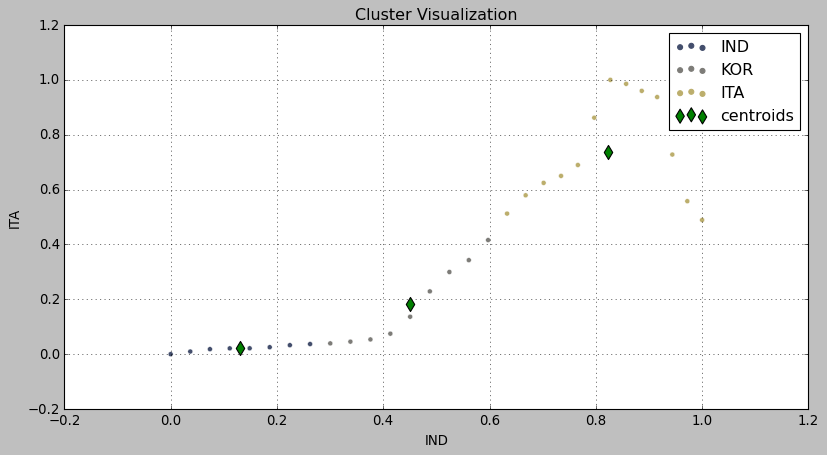

In [113]:
df=pd.DataFrame(norml,columns=my_data1.columns)
plt.figure(figsize=(12,6))
plt.title('Cluster Visualization')
sns.scatterplot(data=df, x="IND", y="ITA", hue=klb,palette="cividis")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="d", c="g", s=80, label="centroids")
plt.grid()
plt.legend()
plt.show()

## Curve Fitting

In [114]:
from scipy.optimize import curve_fit

In [115]:
def exponent(x, a, b, c):
    return a * np.exp(-b * x) + c

In [116]:
y = exponent(my_data2.values[:,1], 1.5, 0.9, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=my_data2.values[:,1].size)
ydata = y + y_noise

In [117]:
popt, pcov = curve_fit(exponent, my_data2.values[:,1], ydata)

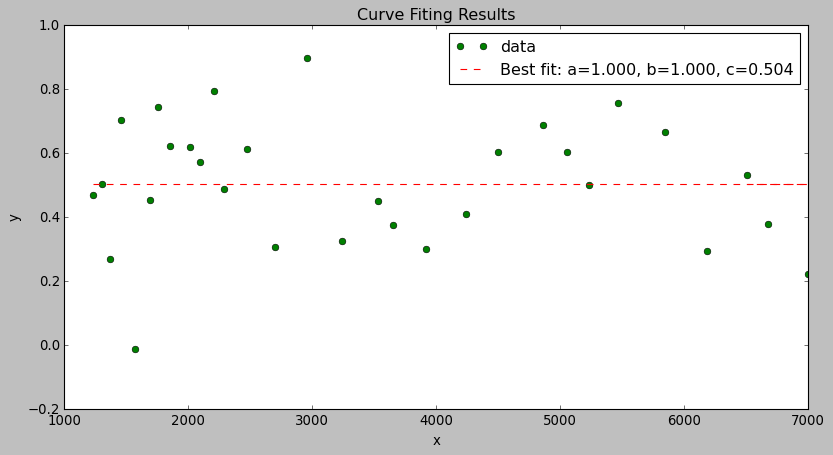

In [119]:
plt.figure(figsize=(12,6))
plt.title('Curve Fiting Results')
plt.plot(my_data2.values[:,0], ydata, 'go', label='data')
plt.plot(my_data2.values[:,0], exponent(my_data2.values[:,0], *popt), 'r--',label='Best fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()